# Sales Prediction Using Python

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
# read the data
df = pd.read_csv("D:/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# shape of the dataset
df.shape

(200, 5)

In [5]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
# checking for duplicate values
df.duplicated().sum()

0

In [7]:
# checking for null values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
# removing column 'unnamed' from the dataset
df.drop(['Unnamed: 0'], axis = 1, inplace = True )
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

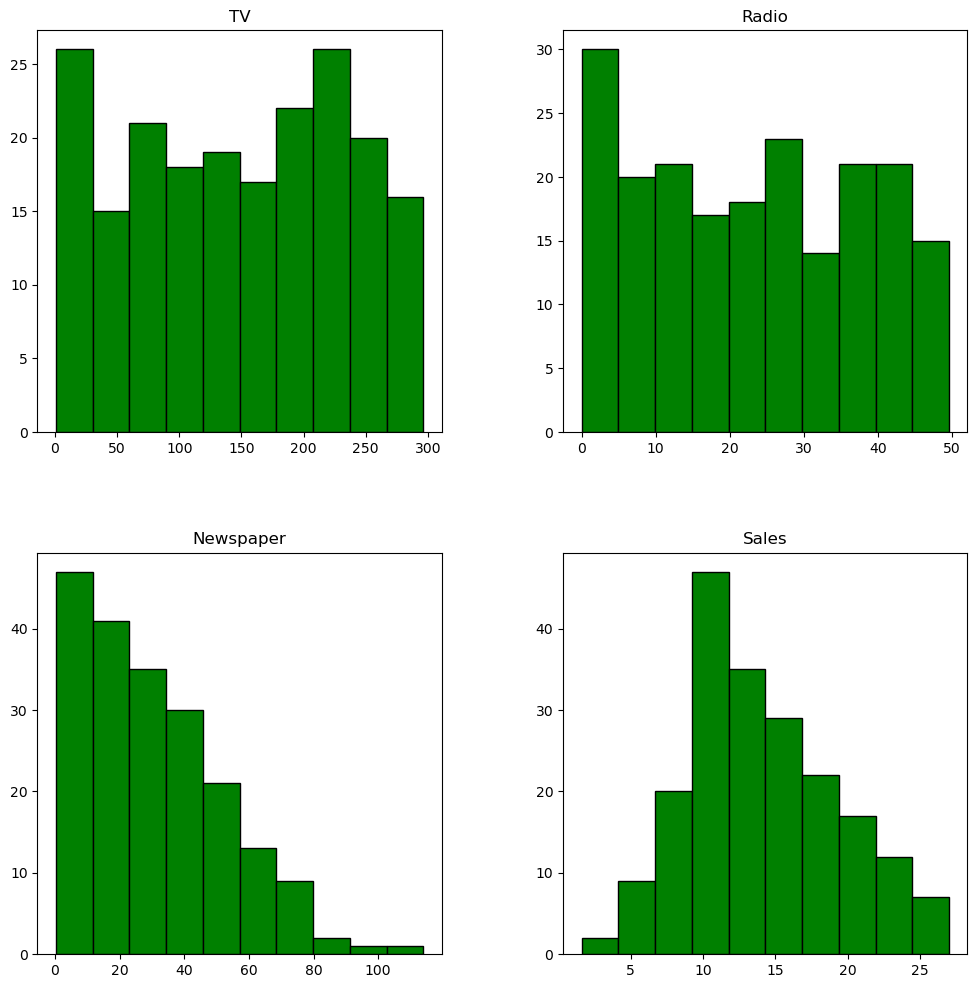

In [10]:
# visualisng the features through histogram
fig, axis = plt.subplots(2,2,figsize=(12,12))
df.hist(ax = axis, edgecolor='black', grid = False, color='green')

<Axes: >

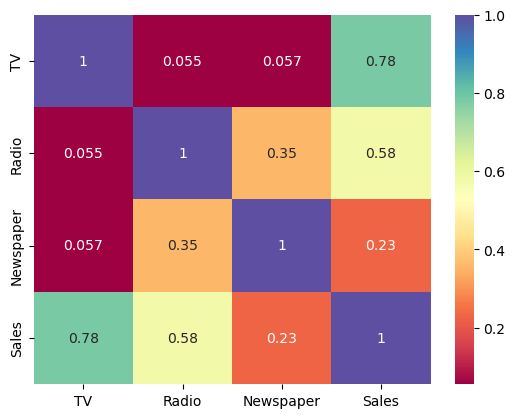

In [31]:
# correlation analysis
sns.heatmap(df.corr(),cmap = 'Spectral', annot = True)

In [11]:
# scaling independent features
scaler = MinMaxScaler()
df[['TV','Radio','Newspaper']] = scaler.fit_transform(df[['TV','Radio','Newspaper']])
df.head(10)

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,22.1
1,0.148123,0.792339,0.394019,10.4
2,0.055800,0.925403,0.606860,9.3
3,0.509976,0.832661,0.511873,18.5
4,0.609063,0.217742,0.510994,12.9
5,0.027054,0.985887,0.656992,7.2
6,0.192087,0.661290,0.204046,11.8
7,0.404126,0.395161,0.099384,13.2
8,0.026716,0.042339,0.006157,4.8
9,0.673318,0.052419,0.183817,10.6


In [12]:
# separating independent and dependent variables
x = df.drop('Sales', axis = 1)
y = df['Sales']

In [13]:
# splitting the data for training and testing
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [14]:
# fit the model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
# training score
lr.score(x_train,y_train)

0.8957008271017818

In [16]:
# evaluate the model
y_pred = lr.predict(x_test)
print('MSE:', mean_squared_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

MSE: 3.174097353976106
R2 score: 0.8994380241009119


<function matplotlib.pyplot.show(close=None, block=None)>

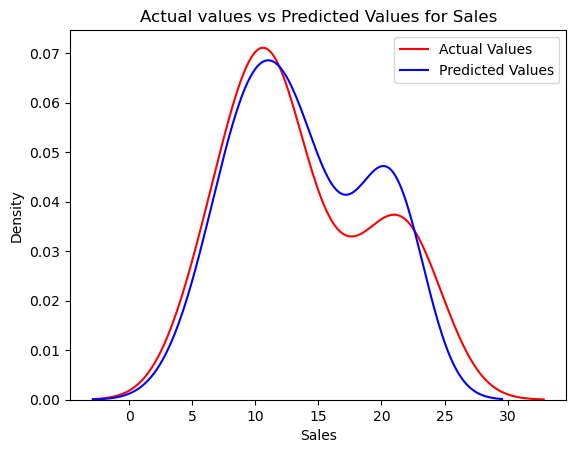

In [17]:
# Distribution plot to visualise actual and predicted values for sales
ax1 = sns.distplot(y_test,hist = False,color='r',label='Actual Values')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Values',ax=ax1)
plt.title('Actual values vs Predicted Values for Sales')
plt.legend(loc=1)
plt.show

In [18]:
# Use of ensemble techniques to improve the accuracy of the model
ensemble_model = RandomForestRegressor(n_estimators = 10,max_depth = 5)
ensemble_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=10)

In [19]:
# training score
ensemble_model.score(x_train,y_train)

0.9903452867965209

<function matplotlib.pyplot.show(close=None, block=None)>

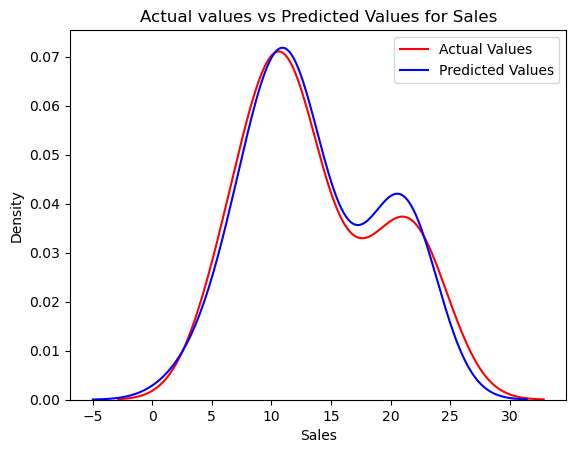

In [20]:
# Distribution plot to visualise actual and predicted values for sales
y_predd = ensemble_model.predict(x_test)
ax1 = sns.distplot(y_test,hist = False,color='r',label='Actual Values')
sns.distplot(y_predd,hist=False,color='b',label='Predicted Values',ax=ax1)
plt.title('Actual values vs Predicted Values for Sales')
plt.legend(loc=1)
plt.show

In [21]:
# Evaluation after appling ensemble techniques
print('MSE:', mean_squared_error(y_test,y_predd))
print('R2 score:',r2_score(y_test,y_predd))

MSE: 0.6614740598415164
R2 score: 0.9790431322529135


In [22]:
# sample prediction
new_sample= np.array([130.7, 44.8, 68.7])
new_sample = new_sample.reshape(1,-1)
predicted_value = ensemble_model.predict(new_sample)
print('Predicted Sales:', predicted_value)

Predicted Sales: [25.32838095]
